<a href="https://colab.research.google.com/github/TranDangKhoi-20146356/AI/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=90afb5164abc498553ac138910f55bc62934eec25eeb91198b235c3ded5fcab0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


0.35


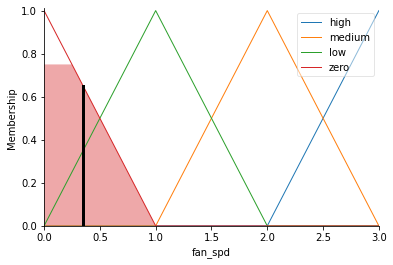

In [ ]:
#EX 2:



import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,11,1),'humidity')
fan_spd = ctrl.Consequent(np.arange(0,4,1),'fan_spd')

temperature['cold'] = fuzz.trimf(temperature.universe,[0,0,15])
temperature['cool'] = fuzz.trimf(temperature.universe,[0,15,25])
temperature['warm']  = fuzz.trimf(temperature.universe,[15,25,40])
temperature['hot']  = fuzz.trimf(temperature.universe,[25,40,40])

humidity['low']= fuzz.trimf(humidity.universe,[0,0,4])
humidity['med'] = fuzz.trimf(humidity.universe,[0,5,10])
humidity['high'] = fuzz.trimf(humidity.universe,[5,10,10])

fan_spd['high'] = fuzz.trimf(fan_spd.universe,[2,3,3])
fan_spd['medium'] = fuzz.trimf(fan_spd.universe,[1,2,3])
fan_spd['low']  = fuzz.trimf(fan_spd.universe,[0,1,2])
fan_spd['zero']  = fuzz.trimf(fan_spd.universe,[0,0,1])

#rule
rule1 = ctrl.Rule(temperature['cold'] & humidity['high'], fan_spd['high'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['med'], fan_spd['medium'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_spd['medium'])

rule4 = ctrl.Rule(temperature['cool'] & humidity['high'], fan_spd['medium'])
rule5 = ctrl.Rule(temperature['cool'] & humidity['med'], fan_spd['low'])
rule6 = ctrl.Rule(temperature['cool'] & humidity['low'], fan_spd['low'])

rule7 = ctrl.Rule(temperature['warm'] & humidity['high'], fan_spd['low'])
rule8 = ctrl.Rule(temperature['warm'] & humidity['med'], fan_spd['zero'])
rule9 = ctrl.Rule(temperature['warm'] & humidity['low'], fan_spd['zero'])

rule10 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_spd['zero'])
rule11 = ctrl.Rule(temperature['hot'] & humidity['med'], fan_spd['zero'])
rule12 = ctrl.Rule(temperature['hot'] & humidity['low'], fan_spd['zero'])

#view
fan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,
                               rule4,rule5,rule6,
                               rule7,rule8,rule9,
                               rule10,rule11,rule12])

fan = ctrl.ControlSystemSimulation(fan_ctrl)
fan.input['temperature'] = 25
fan.input['humidity']    = 1
fan.compute()
print(fan.output['fan_spd'])
fan_spd.view(sim = fan)